In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 5)

#coisas para fazer o RFC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#coisas para testar
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('train_loan_prediction (3).csv',index_col='Loan_ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [3]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


### Trocando as colunas com str e depois as com float e int

In [4]:
a_trocar=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [5]:
for i in a_trocar:
    df[i]=pd.factorize(df[i],na_sentinel=-1)[0]

In [6]:
zero_nan=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for i in zero_nan:
    df[i]=df[i].fillna(-1)

### Trocando os valores omissos 

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [8]:
imp = IterativeImputer(max_iter=100, random_state=0,missing_values=-1)
imp.fit(df)

IterativeImputer(max_iter=100, missing_values=-1, random_state=0)

In [9]:
teste=imp.transform(df)

In [10]:
df2=pd.DataFrame(teste)
colunas=df.columns.values #peggando os nomes das colunas de df e botando no df2
df2.columns=colunas
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,0.0,0.0,5849.0,0.0,138.159286,360.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.000000,360.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.000000,360.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.000000,360.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.000000,360.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.000000,360.0,1.0,1.0,0.0
610,0.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.000000,180.0,1.0,1.0,0.0
611,0.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.000000,360.0,1.0,0.0,0.0
612,0.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.000000,360.0,1.0,0.0,0.0


### Fazendo o ML

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

#coisas para testar
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

In [12]:
x=df2.iloc[:,0:11]
y=df2.iloc[:,11]

x_treino,x_teste,y_treino,y_teste=train_test_split(x,y,random_state=0,test_size=0.3)

In [13]:
#fazendo tudo em escala 
scaler = StandardScaler().fit(x)
x_treino=scaler.transform(x_treino)
x_teste=scaler.transform(x_teste)

In [14]:
#treinando a máquina 

clf=svm.SVC()
clf.fit(x_treino,y_treino)

#testando o modelo

y_pred=clf.predict(x_teste)
print('Acurácia =',round(accuracy_score(y_teste,y_pred),2))
print('MSQR= ',round(mean_squared_error(y_teste,y_pred),2))

Acurácia = 0.84
MSQR=  0.16


In [15]:
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90       134
         1.0       0.89      0.49      0.63        51

    accuracy                           0.84       185
   macro avg       0.86      0.73      0.77       185
weighted avg       0.85      0.84      0.83       185



Text(0.5, 1.0, '"Confusion Matrix normalizada para os valores reais"')

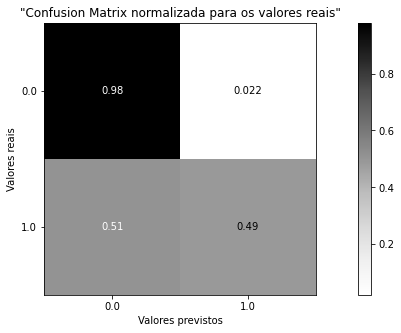

In [16]:
plot_confusion_matrix(clf,x_teste,y_teste,values_format='.2g',normalize='true',cmap='Greys')
plt.xlabel('Valores previstos')
plt.ylabel('Valores reais')
plt.title('"Confusion Matrix normalizada para os valores reais"')

<AxesSubplot:ylabel='Loan_ID'>

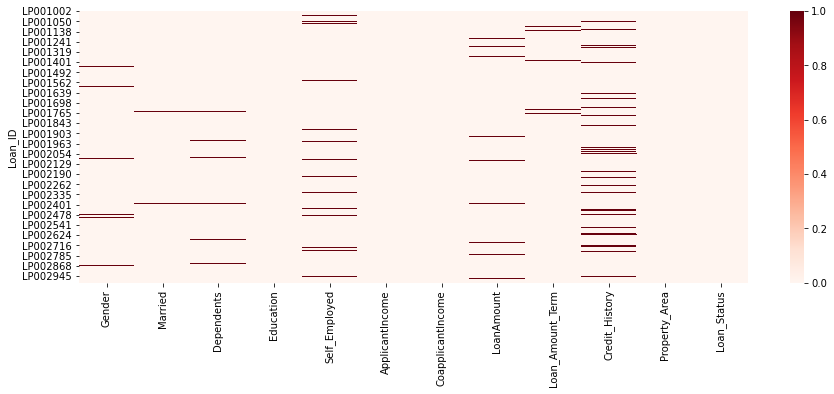

In [17]:
sns.heatmap(df==-1,cmap='Reds')

<AxesSubplot:>

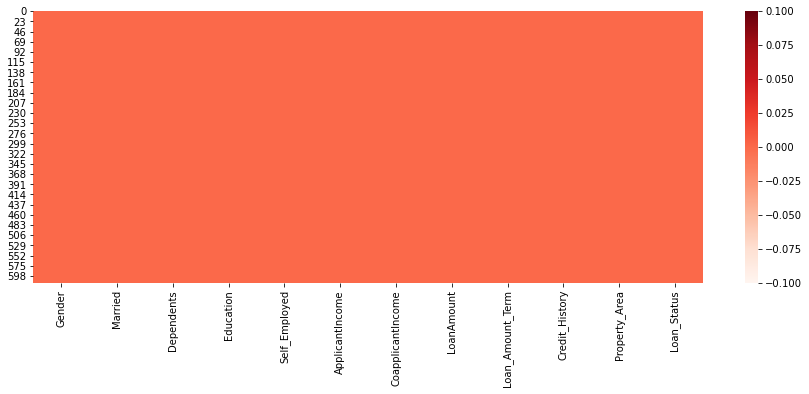

In [18]:
sns.heatmap(df2==-1,cmap='Reds')